<base href="https://github.com/PavlyukovVladimir/SMPR3/blob/master/">

# Тема: «Внутренние и внешние критерии»
## «Скользящий контроль»
<a id='ogl'></a>
<a name="oggl"></a>
* <B>Реализовать:</B>  
  * [Полный СК,](#Полный-СК:)
  * [LOO,](#LOO:)
  * [t x q-блочный СК,](#t-x-q-блочный-СК:)  
  * [СК по случайным подвыборкам,](#СК-по-случайным-подвыборкам:)  
  * [бутстрэп.](#Бутстрэп:)
* <B><a href="#tabl">Вывести результаты в виде таблицы.</a></B>
* <B><a href="#vivodi">Сделать выводы</a></B>

# Посмотрим на результаты работы 3х классификаторов: [Наивный Гауссовский](#bayes_cell), [К ближайших соседей](#k_neighbors_cell) и [Адабуст](#adabust_cell)

In [1]:
import numpy as np#массивы
import matplotlib.pyplot as plt#рисует графики
from matplotlib.colors import ListedColormap#карта цветов
from sklearn import datasets #демонстрационные выборки
from sklearn.naive_bayes import GaussianNB #Гауссовский алгоритм классификации
from sklearn.neighbors import KNeighborsClassifier #добавляем классификцию ближайших соседей
from sklearn.ensemble import AdaBoostClassifier #Адабуст алгоритм классификации
# загрузка данных "Ирисы фишера"
iris = datasets.load_iris()
y=iris.target # номера классов
X=iris.data[:,[0,3]] # 2 признака
h = .01  # шаг сетки
# создание цветовых карт
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

<a id='bayes_cell'></a>

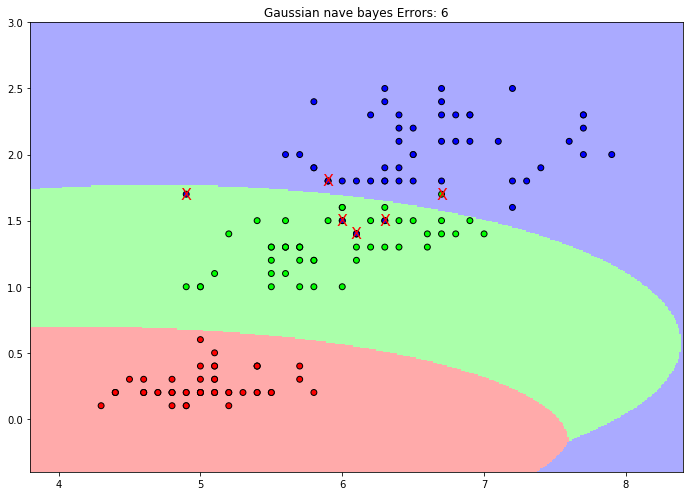

In [2]:
gnb = GaussianNB()
filtr= y!=gnb.fit(X, y).predict(X) # получим логический фильтр неправильно классифицированных элементов
#Для графического представления, найдем максимальные и минимальные значения признаков и увеличим(уменьшим) их на 1
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
# получим сетку
xx, yy = np.meshgrid(np.arange(x_min - 1, x_max + 1, h), np.arange(y_min - 1, y_max + 1, h))
# метод ravel "распутывает" матрицу в массив приставляя к первой строке вторую потом третью и т.д.
# метод c_ принимает два массива и превращает их в матрицу, где эти массивы столбцы
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()]) # классифицыруем сетку
# аргумент shape выдает форму матрицы (число строк, число столбцов)
# метод reshape принимает форму и переделывает в соответствии с ней
Z = Z.reshape(xx.shape)
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False) # создаем фигуру
fig.set_size_inches(29.7 / 2.54 , 21. / 2.54) # установить размер изображения формат А4, альбомная ориентация
axs.pcolormesh(xx, yy, Z, cmap=cmap_light) #заливаем фон разными цветами, на основе сетки, классификации и цветовой карты
# раставляем элементы выборки кружками радиуса 35 с черным ободком
axs.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=35) # наносим известные элементы на график
XErr = X[filtr] # массив неправильноклассифицированных элементов
yErr = y[filtr] # соответствующие им правильные ответы
# зачеркиваем неправильтно классифицированные элементы красными "иксами"
for Er in XErr:
    axs.text(Er[0], Er[1], "X", color="r", fontsize=16, horizontalalignment='center', verticalalignment='center')
# установка ограничений на оси, немного обрежем по краям график, чтобы увеличиласть область с известными ответами
axs.set_xlim(x_min-0.5, x_max+0.5)
axs.set_ylim(y_min-0.5, y_max+0.5)
# добавление заголовка
axs.set_title("Gaussian nave bayes Errors: %i" % len(XErr))
plt.show()

<a id='k_neighbors_cell'></a>

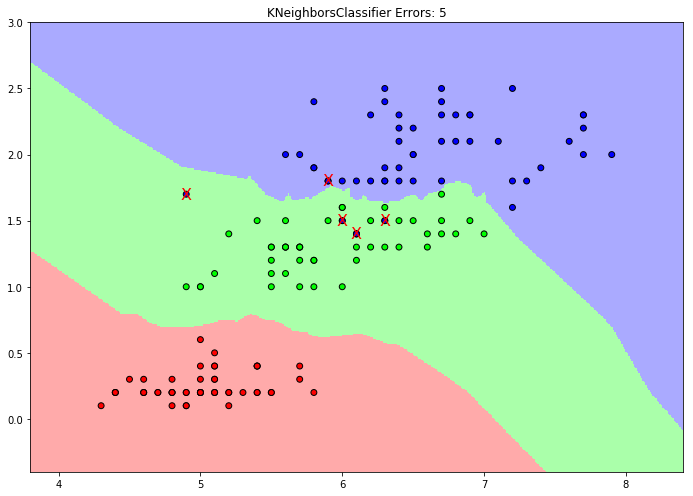

In [3]:
knc = KNeighborsClassifier()
filtr= y!=knc.fit(X, y).predict(X) # получим логический фильтр неправильно классифицированных элементов
Z = knc.predict(np.c_[xx.ravel(), yy.ravel()]) # классифицируем сетку
# аргумент shape выдает форму матрицы (число строк, число столбцов)
# метод reshape принимает форму и переделывает в соответствии с ней
Z = Z.reshape(xx.shape)
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False) # создаем фигуру
fig.set_size_inches(29.7 / 2.54 , 21. / 2.54) # установить размер изображения формат А4, альбомная ориентация
axs.pcolormesh(xx, yy, Z, cmap=cmap_light) #заливаем фон разными цветами, на основе сетки, классификации и цветовой карты
# раставляем элементы выборки кружками радиуса 35 с черным ободком
axs.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=35) # наносим известные элементы на график
XErr = X[filtr] # массив неправильноклассифицированных элементов
yErr = y[filtr] # соответствующие им правильные ответы
# зачеркиваем неправильтно классифицированные элементы красными "иксами"
for Er in XErr:
    axs.text(Er[0], Er[1], "X", color="r", fontsize=16, horizontalalignment='center', verticalalignment='center')
# установка ограничений на оси, немного обрежем по краям график, чтобы увеличиласть область с известными ответами
axs.set_xlim(x_min-0.5, x_max+0.5)
axs.set_ylim(y_min-0.5, y_max+0.5)
# добавление заголовка
axs.set_title("KNeighborsClassifier Errors: %i" % len(XErr))
plt.show()

<a id='adabust_cell'></a>

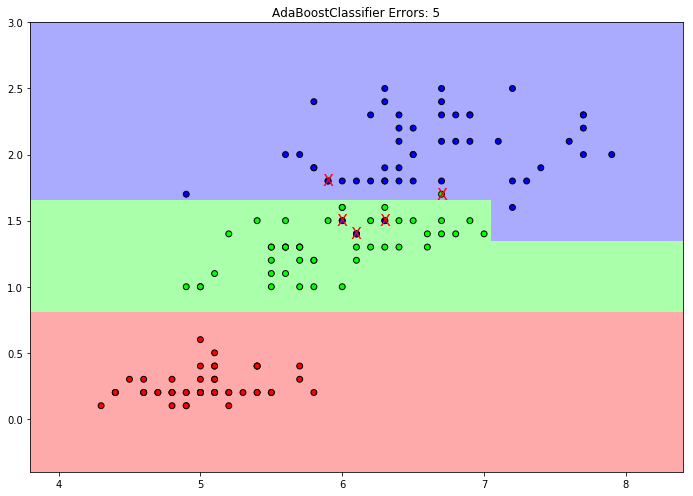

In [4]:
abc = AdaBoostClassifier()
filtr= y!=abc.fit(X, y).predict(X) # получим логический фильтр неправильно классифицированных элементов
Z = abc.predict(np.c_[xx.ravel(), yy.ravel()]) # классифицыруем сетку
# аргумент shape выдает форму матрицы (число строк, число столбцов)
# метод reshape принимает форму и переделывает в соответствии с ней
Z = Z.reshape(xx.shape)
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False) # создаем фигуру
fig.set_size_inches(29.7 / 2.54 , 21. / 2.54) # установить размер изображения формат А4, альбомная ориентация
axs.pcolormesh(xx, yy, Z, cmap=cmap_light) #заливаем фон разными цветами, на основе сетки, классификации и цветовой карты
# раставляем элементы выборки кружками радиуса 35 с черным ободком
axs.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=35) # наносим известные элементы на график
XErr = X[filtr] # массив неправильноклассифицированных элементов
yErr = y[filtr] # соответствующие им правильные ответы
# зачеркиваем неправильтно классифицированные элементы красными "иксами"
for Er in XErr:
    axs.text(Er[0], Er[1], "X", color="r", fontsize=16, horizontalalignment='center', verticalalignment='center')
# установка ограничений на оси, немного обрежем по краям график, чтобы увеличиласть область с известными ответами
axs.set_xlim(x_min-0.5, x_max+0.5)
axs.set_ylim(y_min-0.5, y_max+0.5)
# добавление заголовка
axs.set_title("AdaBoostClassifier Errors: %i" % len(XErr))
plt.show()

# Попробуем оценить их качество различными способами
# Полный СК:

[Возврат к оглавлению](#ogl)

In [5]:
from itertools import combinations as combi # подгружаем функцию для получения сочетаний
import random as rnd
def CCV_ind(N,k,seed=None,shuffle=True):
    """выдает индексы элементов всех возможных сочетаний из N элементов по k элементов"""
    R=set(range(N))
    mc = combi(R,k) # тут получен итератор выдающий все сочетания из элементов множества R по k
    lst = [(list(R-set(x)),list(x)) for x in mc] # сборка списка кортежей элементами которых являются пары:
                                        # кортеж невошедших в сочетание элементов и кортеж вошедших в сочетание элементов
    if shuffle: # если требуется перемешать порядок элементов
        rnd.seed(seed)
        rnd.shuffle(lst)
        return lst
    else:
        return lst

In [6]:
N=len(X) # число элементов
from math import factorial
def cnk(N,k):
    """подсчитывает число сочетаний из N по k"""
    return factorial(N)//(factorial(k)*factorial(N-k))
f = [cnk(N,k) for k in range(1,N)]
print('Максимальное возможное число сочитаний, это из %i по %i - %i сочетаний'%(N,f.index(max(f))+1,max(f)))

Максимальное возможное число сочитаний, это из 150 по 75 - 92826069736708789698985814872605121940117520 сочетаний


In [7]:
k=int(0.25*N)
print('Даже если взять 25%% выборки, число сочетаний из %i по %i = %i, что очень долго будет вычисляться'%(N,int(0.25*N),cnk(N,int(0.25*N))))

Даже если взять 25% выборки, число сочетаний из 150 по 37 = 186045619091864484034331553863559000, что очень долго будет вычисляться


In [8]:
print('для примера проверим все сочетания по 2')
import time
a= time.time()
ferr=0
double_cv=CCV_ind(N,2)
for split_option in double_cv:
    X_train=X[split_option[0]]
    y_train=y[split_option[0]]
    X_test=X[split_option[1]]
    y_test=y[split_option[1]]
    ferr+=sum(y_test != gnb.fit(X_train, y_train).predict(X_test))/len(y_test)
print('наивный баес:')
print((time.time()-a)/60.,"мин")
print(ferr/len(double_cv),'ошибка скользящего контроля')
a= time.time()
ferr=0
for split_option in double_cv:
    X_train=X[split_option[0]]
    y_train=y[split_option[0]]
    X_test=X[split_option[1]]
    y_test=y[split_option[1]]
    ferr+=sum(y_test != knc.fit(X_train, y_train).predict(X_test))/len(y_test)
print('ближайших соседей')
print((time.time()-a)/60.,"мин")
print(ferr/len(double_cv),'ошибка скользящего контроля')
a= time.time()
ferr=0
for split_option in double_cv:
    X_train=X[split_option[0]]
    y_train=y[split_option[0]]
    X_test=X[split_option[1]]
    y_test=y[split_option[1]]
    ferr+=sum(y_test != abc.fit(X_train, y_train).predict(X_test))/len(y_test)
print('адабуст над деревьями')
print((time.time()-a)/60.,"мин")
print(ferr/len(double_cv),'ошибка скользящего контроля')

для примера проверим все сочетания по 2
наивный баес:
0.13926189343134562 мин
0.040134228187919466 ошибка скользящего контроля
ближайших соседей
0.18291255235671997 мин
0.04022371364653244 ошибка скользящего контроля
адабуст над деревьями
9.386988592147826 мин
0.04756152125279642 ошибка скользящего контроля


In [9]:
print('Итог: адабуст очень медленный и не стоит пытаться сравнивать его с другими методами посредством полной кросвалидации потому, что уже при переборе всех возможных сочетаний из 150 элементов при 2х контрольных, алгоритм работает 9 минут, a уже при 3х контрольных, его время работы станет примерно: %i мин'%(9*cnk(150,3)/cnk(150,2)))

Итог: адабуст очень медленный и не стоит пытаться сравнивать его с другими методами посредством полной кросвалидации потому, что уже при переборе всех возможных сочетаний из 150 элементов при 2х контрольных, алгоритм работает 9 минут, a уже при 3х контрольных, его время работы станет примерно: 444 мин


In [10]:
print('проверим все сочетания по 3')
import time
a= time.time()
ferr=0
double_cv=CCV_ind(N,3)
for split_option in double_cv:
    X_train=X[split_option[0]]
    y_train=y[split_option[0]]
    X_test=X[split_option[1]]
    y_test=y[split_option[1]]
    ferr+=sum(y_test != gnb.fit(X_train, y_train).predict(X_test))/len(y_test)
print('наивный баес:')
print((time.time()-a)/60.,"мин")
print(ferr/len(double_cv),'ошибка скользящего контроля')
a= time.time()
ferr=0
for split_option in double_cv:
    X_train=X[split_option[0]]
    y_train=y[split_option[0]]
    X_test=X[split_option[1]]
    y_test=y[split_option[1]]
    ferr+=sum(y_test != knc.fit(X_train, y_train).predict(X_test))/len(y_test)
print('ближайших соседей')
print((time.time()-a)/60.,"мин")
print(ferr/len(double_cv),'ошибка скользящего контроля')
a= time.time()
ferr=0

проверим все сочетания по 3
наивный баес:
6.9144278009732565 мин
0.040250317431510495 ошибка скользящего контроля
ближайших соседей
9.302049243450165 мин
0.040467984763271035 ошибка скользящего контроля


__Вывод: метод полной кроссвалидации очень громоздок, в данной конкретной задаче не стоит пытаться сравнить выбранные методы классификации друг с другом таким образом__

___Дополнительно: самым быстрым и точным оказался наивный байесовский классификатор, точность обьясняется тем, что рост цветков ириса, подчиняется нормальным случайным распределениям, скорость - простотой метода___

# LOO:
[Возврат к оглавлению](#ogl)

LOO - это частный случай полного перекрестного контроля при длинне контрольной выборки равной 1

In [11]:
a= time.time()
ferr=0
ccv=CCV_ind(N,1)
for split_option in ccv:
    X_train=X[split_option[0]]
    y_train=y[split_option[0]]
    X_test=X[split_option[1]]
    y_test=y[split_option[1]]
    ferr+=sum(y_test != gnb.fit(X_train, y_train).predict(X_test))
print('наивный баес:')
print((time.time()-a)/60.,"мин")
print(ferr/len(ccv),'ошибка скользящего контроля')
a= time.time()
ferr=0
for split_option in ccv:
    X_train=X[split_option[0]]
    y_train=y[split_option[0]]
    X_test=X[split_option[1]]
    y_test=y[split_option[1]]
    ferr+=sum(y_test != knc.fit(X_train, y_train).predict(X_test))
print('ближайших соседей:')
print((time.time()-a)/60.,"мин")
print(ferr/len(ccv),'ошибка скользящего контроля')
a= time.time()
ferr=0
for split_option in ccv:
    X_train=X[split_option[0]]
    y_train=y[split_option[0]]
    X_test=X[split_option[1]]
    y_test=y[split_option[1]]
    ferr+=sum(y_test != abc.fit(X_train, y_train).predict(X_test))
print('адабуст над деревьями:')
print((time.time()-a)/60.,"мин")
print(ferr/len(ccv),'ошибка скользящего контроля')

наивный баес:
0.0023008068402608235 мин
0.04 ошибка скользящего контроля
ближайших соседей:
0.002916840712229411 мин
0.04 ошибка скользящего контроля
адабуст над деревьями:
0.1215276837348938 мин
0.04666666666666667 ошибка скользящего контроля


__Наивный байес снова лидер__

# t x q-блочный СК:
[Возврат к оглавлению](#ogl)

In [12]:
def txq(N,t,q,seed=None):
    """выдает список из t наборов индексов случайных разбиений N элементов на q блоков"""
    lst=list(range(N)) # список индексов
    rnd.seed(seed)
    n=N//q # минимальная длинна блока
    r=N%q # "лишние" элементы
    l=[n for i in range(q)] # список длинн блоков
    for i in range(r): # добавим по одному "лишниему" элементу в первые r
        l[i]+=1
    L=[] # главный список
    for i in range(t):
        rnd.shuffle(lst) # перемешиваем список индексов
        tlst=lst.copy() # создаем копию из которой будут удаляться элементы
        lt=[] # список который будет содержать блоки
        for j in l:
            lq=[] # создаем новый пустой блок
            for k in range(j): # наполняем блок j элементами из списка
                lq.append(tlst.pop())
            lt.append(lq)
        L.append(lt)
    return L
print(txq.__name__,txq.__doc__)
print()
def tt_samples(LL):
    """преобразует список списков, в список всех возможных двух-элементных списков, в которых\nвторые элементы это один из подсписков, а первые элементы это список элементов оставшихся подсписков\nпример:\n[[1,2],[3,4],[5,6]] станет:\n[\n  [[3, 4, 5, 6], [1, 2]],\n  [[1, 2, 5, 6], [3, 4]],\n  [[1, 2, 3, 4], [5, 6]]\n]"""
    L=[] # главный список
    n=range(len(LL))
    for i in n:
        tl=[]
        for j in n:
            if j!=i:
                tl.extend(LL[j])
        L.append([tl,LL[i]])
    return L
print(tt_samples.__name__,tt_samples.__doc__)

txq выдает список из t наборов индексов случайных разбиений N элементов на q блоков

tt_samples преобразует список списков, в список всех возможных двух-элементных списков, в которых
вторые элементы это один из подсписков, а первые элементы это список элементов оставшихся подсписков
пример:
[[1,2],[3,4],[5,6]] станет:
[
  [[3, 4, 5, 6], [1, 2]],
  [[1, 2, 5, 6], [3, 4]],
  [[1, 2, 3, 4], [5, 6]]
]


In [13]:
ggg=txq(7,8,3) # для демонстрации разобьем 7 элементов на три случайных блока 8 раз
m=0 # номер разбиения
for gg in ggg:
    m+=1
    print('%i'%m,gg) # вывод разбиения
    for g in tt_samples(gg): # преобразование разбиения в список всех обучающих и контрольных выборок
        print(g)

1 [[6, 3, 5], [1, 2], [0, 4]]
[[1, 2, 0, 4], [6, 3, 5]]
[[6, 3, 5, 0, 4], [1, 2]]
[[6, 3, 5, 1, 2], [0, 4]]
2 [[5, 2, 0], [3, 4], [6, 1]]
[[3, 4, 6, 1], [5, 2, 0]]
[[5, 2, 0, 6, 1], [3, 4]]
[[5, 2, 0, 3, 4], [6, 1]]
3 [[4, 5, 1], [6, 2], [3, 0]]
[[6, 2, 3, 0], [4, 5, 1]]
[[4, 5, 1, 3, 0], [6, 2]]
[[4, 5, 1, 6, 2], [3, 0]]
4 [[2, 4, 1], [3, 5], [6, 0]]
[[3, 5, 6, 0], [2, 4, 1]]
[[2, 4, 1, 6, 0], [3, 5]]
[[2, 4, 1, 3, 5], [6, 0]]
5 [[0, 6, 3], [5, 2], [1, 4]]
[[5, 2, 1, 4], [0, 6, 3]]
[[0, 6, 3, 1, 4], [5, 2]]
[[0, 6, 3, 5, 2], [1, 4]]
6 [[2, 1, 4], [3, 0], [6, 5]]
[[3, 0, 6, 5], [2, 1, 4]]
[[2, 1, 4, 6, 5], [3, 0]]
[[2, 1, 4, 3, 0], [6, 5]]
7 [[3, 2, 0], [1, 6], [5, 4]]
[[1, 6, 5, 4], [3, 2, 0]]
[[3, 2, 0, 5, 4], [1, 6]]
[[3, 2, 0, 1, 6], [5, 4]]
8 [[5, 6, 0], [4, 1], [3, 2]]
[[4, 1, 3, 2], [5, 6, 0]]
[[5, 6, 0, 3, 2], [4, 1]]
[[5, 6, 0, 4, 1], [3, 2]]


In [14]:
N=150
t=40
# возьмем за длинну контрольной выборки, например 20% исходной, тогда q будет равна 100//20=5
q=5
lblocks=txq(N,t,q) # список разбиений на блоки
a=time.time()
ferr=0
for blocks in lblocks:
    nb=len(blocks)
    for tt in tt_samples(blocks):
        X_train=X[tt[0]]
        y_train=y[tt[0]]
        X_test=X[tt[1]]
        y_test=y[tt[1]]
        ferr+=sum(y_test != gnb.fit(X_train, y_train).predict(X_test))/len(y_test)
print('наивный баес:')
print((time.time()-a)/60.,"мин")
print(ferr/(t*q),'ошибка скользящего контроля')
a=time.time()
ferr=0
for blocks in lblocks:
    nb=len(blocks)
    for tt in tt_samples(blocks):
        X_train=X[tt[0]]
        y_train=y[tt[0]]
        X_test=X[tt[1]]
        y_test=y[tt[1]]
        ferr+=sum(y_test != knc.fit(X_train, y_train).predict(X_test))/len(y_test)
print('ближайших соседей:')
print((time.time()-a)/60.,"мин")
print(ferr/(t*q),'ошибка скользящего контроля')
a=time.time()
ferr=0
for blocks in lblocks:
    nb=len(blocks)
    for tt in tt_samples(blocks):
        X_train=X[tt[0]]
        y_train=y[tt[0]]
        X_test=X[tt[1]]
        y_test=y[tt[1]]
        ferr+=sum(y_test != abc.fit(X_train, y_train).predict(X_test))/len(y_test)
print('адабуст над деревьями:')
print((time.time()-a)/60.,"мин")
print(ferr/(t*q),'ошибка скользящего контроля')

наивный баес:
0.0031059702237447103 мин
0.042999999999999934 ошибка скользящего контроля
ближайших соседей:
0.007383914788564047 мин
0.04583333333333326 ошибка скользящего контроля
адабуст над деревьями:
0.1609281261761983 мин
0.06099999999999988 ошибка скользящего контроля


___Ожидаемо лучший результат у наивного байеса, и вполне неплохая скорость расчета ошибки скользящего контроля для всех методов___

# СК по случайным подвыборкам:
[Возврат к оглавлению](#ogl)

In [15]:
def rc_samples(N,K,seed=None):
    """Создаст список индексов из K дву-элементных списков, второй элемент которых - это список случайного количества случайных индексов контрольных элементов, а второй это список индексов остальных элементв"""
    rnd.seed(seed)
    lst=list(range(N))
    L=[]
    for i in range(K):
        tlst=lst.copy()
        tl=[]
        rnd.shuffle(tlst)
        for i in range(rnd.randint(1,N-1)):
            tl.append(tlst.pop())
        L.append([tlst,tl])
    return L
print('пример:')
for g in rc_samples(10,10):
    print(g)

пример:
[[1], [3, 2, 8, 9, 5, 6, 4, 7, 0]]
[[9, 0, 7, 4, 6, 2, 8, 5, 1], [3]]
[[6, 5, 2, 4, 8, 9, 7, 3], [1, 0]]
[[5], [1, 4, 6, 9, 7, 8, 0, 3, 2]]
[[0, 5, 2, 7, 6, 9], [3, 8, 1, 4]]
[[4, 5, 0, 6, 9, 8, 3], [2, 1, 7]]
[[5, 8, 9], [0, 4, 2, 7, 1, 6, 3]]
[[8, 6], [2, 4, 7, 9, 0, 1, 5, 3]]
[[5, 1, 7, 2, 0, 4, 9, 3, 8], [6]]
[[5, 1], [3, 4, 9, 6, 8, 0, 2, 7]]


In [16]:
K=39 # число подвыборок
N=150 # число элементов
a= time.time()
ferr=0
rcs=rc_samples(N,K)
for split_option in rcs:
    X_train=X[split_option[0]]
    y_train=y[split_option[0]]
    X_test=X[split_option[1]]
    y_test=y[split_option[1]]
    ferr+=sum(y_test != gnb.fit(X_train, y_train).predict(X_test))/len(y_test)
print('наивный байес:')
print((time.time()-a)/60.,"мин")
print(ferr/K,'ошибка скользящего контроля')
a= time.time()
ferr=0
for split_option in rcs:
    X_train=X[split_option[0]]
    y_train=y[split_option[0]]
    X_test=X[split_option[1]]
    y_test=y[split_option[1]]
    ferr+=sum(y_test != knc.fit(X_train, y_train).predict(X_test))/len(y_test)
print('ближайших соседей')
print((time.time()-a)/60.,"мин")
print(ferr/K,'ошибка скользящего контроля')
a= time.time()
ferr=0
for split_option in rcs:
    X_train=X[split_option[0]]
    y_train=y[split_option[0]]
    X_test=X[split_option[1]]
    y_test=y[split_option[1]]
    ferr+=sum(y_test != abc.fit(X_train, y_train).predict(X_test))/len(y_test)
print('адабуст над деревьями')
print((time.time()-a)/60.,"мин")
print(ferr/K,'ошибка скользящего контроля')

наивный байес:
0.0010473171869913736 мин
0.08576211280905673 ошибка скользящего контроля
ближайших соседей
0.0021593133608500165 мин
0.09785857392595723 ошибка скользящего контроля
адабуст над деревьями
0.031474725405375166 мин
0.07846066474895567 ошибка скользящего контроля


___Скользящий контроль по случайным выборкам показывает большую частоту ошибок, вероятно в силу того, что допускает обучающие выборки короче контрольных.___

___В методе ближайших соседей он иногда приводит к ошибкам, потому что длинна обучающей выборки может оказаться меньше допустимой___

# Бутстрэп:
[Возврат к оглавлению](#ogl)

In [17]:
def bootstrap(N,K,seed=None):
    """Вернет список из K списков по N индексов, случайно выбранных с возвратом"""
    rnd.seed(seed)
    lst=list(range(N))
    return [[lst[rnd.randrange(0,N)] for i in range(N)] for j in range(K)]

print('пример:')
for g in bootstrap(5,10):
    print(g)

пример:
[3, 1, 1, 1, 3]
[0, 1, 3, 3, 3]
[4, 3, 1, 4, 1]
[3, 0, 0, 2, 0]
[1, 4, 0, 3, 0]
[0, 1, 0, 2, 2]
[0, 0, 3, 4, 2]
[1, 2, 4, 3, 0]
[0, 1, 0, 2, 1]
[4, 0, 2, 4, 2]


In [18]:
N=150
K=100
a= time.time()
ferr=0
bcs=bootstrap(N,K)
X_test=X
y_test=y
for split_option in bcs:
    X_train=X[split_option]
    y_train=y[split_option]
    ferr+=sum(y_test != gnb.fit(X_train, y_train).predict(X_test))/N
print('наивный байес:')
print((time.time()-a)/60.,"мин")
print(ferr/K,'ошибка скользящего контроля')
a= time.time()
ferr=0
for split_option in bcs:
    X_train=X[split_option]
    y_train=y[split_option]
    ferr+=sum(y_test != knc.fit(X_train, y_train).predict(X_test))/N
print('ближайших соседей')
print((time.time()-a)/60.,"мин")
print(ferr/K,'ошибка скользящего контроля')
a= time.time()
ferr=0
for split_option in bcs:
    X_train=X[split_option]
    y_train=y[split_option]
    ferr+=sum(y_test != abc.fit(X_train, y_train).predict(X_test))/N
print('адабуст над деревьями')
print((time.time()-a)/60.,"мин")
print(ferr/K,'ошибка скользящего контроля')

наивный байес:
0.002576732635498047 мин
0.04366666666666669 ошибка скользящего контроля
ближайших соседей
0.009234182039896647 мин
0.050533333333333354 ошибка скользящего контроля
адабуст над деревьями
0.08749039967854817 мин
0.05560000000000003 ошибка скользящего контроля


<a name="tabl"></a>
# Вывод результатов в виде таблицы:
[Возврат к оглавлению](#ogl)

| метод отбора параметров | алгоритм | время выполнения | ошибка скользящего контроля |
| :-- --: | :-- --: | :-- --: | :-- --: |
| Полный СК для 2 | наивный байес | 0,1393 мин | 4,0% |
| Полный СК для 2 | К-соседей | 0,1829 мин | 4,0% |
| Полный СК для 2 | адабуст над деревьями | 9,3870 мин | 4,8% |
| Полный СК для 3 | наивный байес | 6,9144 мин | 4,0% |
| Полный СК для 3 | К-соседей | 9,3020 мин | 4,0% |
| Полный СК для 3 | адабуст над деревьями | ___ | ___ |
| LOO | наивный байес | 0,0023 мин | 4,0% |
| LOO | К-соседей | 0,0029 мин | 4,0% |
| LOO | адабуст над деревьями | 0,1215 мин | 4,7% |
| t x q блочный | наивный байес | 0,0031 мин | 4,3% |
| t x q блочный | К-соседей | 0,0074 мин | 4,6% |
| t x q блочный | адабуст над деревьями | 0,1609 мин | 6,1% |
| СК по случайным подвыборкам | наивный байес | 0,0010 мин | 8,6% |
| СК по случайным подвыборкам | К-соседей | 0,0022 мин | 9,8% |
| СК по случайным подвыборкам | адабуст над деревьями | 0,0315 мин | 7,8% |
| Бутстреп | наивный байес | 0,0026 мин | 4,4% |
| Бутстреп | К-соседей | 0,0092 мин | 5,1% |
| Бутстреп | адабуст над деревьями | 0,0875 мин | 5,5% |

<a name="vivodi"></a>
# Выводы:
<a href="#oggl">Возврат к оглавлению</a>

- Полный СК для 2 и 3, а также LOO показали схожие результаты качества, но скорость расчета у них значительно отличается
- t x q блочный CK и Бутстреп дают схожие результаты
- CK по случайным подвыборкам сильно завышает число ошибок и даже может оказаться не применим в виду того, что допускает короткие обучающие выборки
- почти все методы указывают на лучшую применимлсть к классификации ирисов наивного байесовского алгоритма